## Librerias

Se importan las librerías que vamos a utilizar.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score

## Carga de set de datos

Se cargan archivo del set de datos final.

In [20]:
trata_exp = pd.read_csv('trata_exp.csv') #Lectura de Archivo

Informacion del dataframe.

Se realiza vista previa del dataframe.

In [21]:
trata_exp.head()

,Code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit,Value,Source
0,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,0 to 17 years,2017,Counts,3,GLOTIP
1,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,18 years or over,2017,Counts,3,GLOTIP
2,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,0 to 17 years,2017,Counts,12,GLOTIP
3,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,18 years or over,2017,Counts,5,GLOTIP
4,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Sexual exploitation,Female,0 to 17 years,2017,Counts,3,GLOTIP


In [22]:
trata_exp

,Code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit,Value,Source
0,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,0 to 17 years,2017,Counts,3,GLOTIP
1,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Female,18 years or over,2017,Counts,3,GLOTIP
2,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,0 to 17 years,2017,Counts,12,GLOTIP
3,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Forced labour,Male,18 years or over,2017,Counts,5,GLOTIP
4,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Sexual exploitation,Female,0 to 17 years,2017,Counts,3,GLOTIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736,UZB,Uzbekistan,Asia,Central Asia,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,0 to 17 years,2021,Counts,20,GLOTIP
5737,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Female,0 to 17 years,2020,Counts,3,GLOTIP
5738,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Female,18 years or over,2020,Counts,3,GLOTIP
5739,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Other forms of exploitation,Male,0 to 17 years,2020,Counts,3,GLOTIP


## Evaluación del modelo

Visualiza panorama de los valores por año de Argentina.

In [23]:
argentina_data = trata_exp[trata_exp['Country'] == 'Argentina']

# Agrupa los datos filtrados por año y sumar los valores para cada año
argentina_grouped = argentina_data.groupby('Year')['Value'].sum()

In [24]:
argentina_grouped

Year
2014     342
2015     354
2016     423
2017      15
2018      15
2019    1621
2020     963
2021    1426
Name: Value, dtype: int64

Convierte a dataframe al grupo sumatorio por año.

In [25]:
argentina_grouped = argentina_grouped.reset_index()
print(argentina_grouped.head())

   Year  Value
0  2014    342
1  2015    354
2  2016    423
3  2017     15
4  2018     15


<Axes: xlabel='Year', ylabel='Value'>

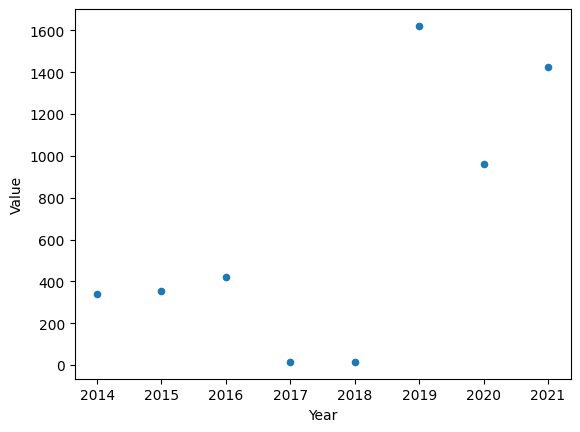

In [26]:
argentina_grouped.plot.scatter(x="Year", y="Value")

## Regresión lineal 

Instancia modelo.

In [27]:
regresion = linear_model.LinearRegression()

#convertir la serie de pandas en un arreglo NumPy.
anio = argentina_grouped["Year"].values.reshape((-1, 1))

Entrena modelo.

In [28]:
modelo = regresion.fit(anio, argentina_grouped["Value"])

Estima valor de a y b de la recta.

In [29]:
print("Intersección (b)", modelo.intercept_)
print("Pendiente (m)", modelo.coef_)

Intersección (b) -341057.17857142864
Pendiente (m) [169.36904762]


Predice valores para años anteriores no evaluados y a futuro.

In [30]:
# en entrada guardamos los valores de x para los cuales deseamos predecir y.
entrada = np.arange(2010, 2041).reshape(-1, 1)
modelo.predict(entrada)

array([-625.39285714, -456.02380952, -286.6547619 , -117.28571429,
         52.08333333,  221.45238095,  390.82142857,  560.19047619,
        729.55952381,  898.92857143, 1068.29761905, 1237.66666667,
       1407.03571429, 1576.4047619 , 1745.77380952, 1915.14285714,
       2084.51190476, 2253.88095238, 2423.25      , 2592.61904762,
       2761.98809524, 2931.35714286, 3100.72619048, 3270.0952381 ,
       3439.46428571, 3608.83333333, 3778.20238095, 3947.57142857,
       4116.94047619, 4286.30952381, 4455.67857143])

Predice valores para años no evaluados y a futuro.

In [31]:
predicciones = modelo.predict(entrada)

# Calculo del coeficiente de determinación R cuadrado.
r2 = r2_score(argentina_grouped["Value"], modelo.predict(anio))
print("Coeficiente de determinación R cuadrado:", r2)

Coeficiente de determinación R cuadrado: 0.4490127686783645


Grafica (Los puntos en rojo son los valores predecidos.

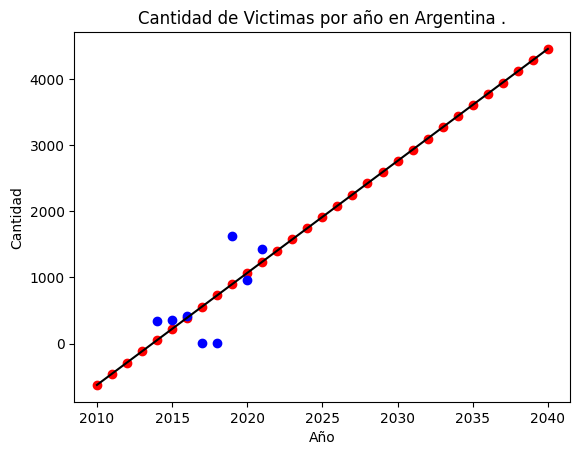

In [32]:
plt.scatter(entrada, modelo.predict(entrada), color="red") #datos de prueba
plt.plot(entrada, modelo.predict(entrada), color="black") #recta

plt.title('Cantidad de Victimas por año en Argentina .')
plt.ylabel("Cantidad")
plt.xlabel("Año")
plt.scatter(argentina_grouped["Year"], argentina_grouped["Value"], color="blue") #datos de entrenamiento
plt.show()

Predicción para el año 2040.

In [33]:
anio=2040
cantidad_de_casos = modelo.intercept_ + modelo.coef_ * anio
cantidad_de_casos

array([4455.67857143])

se estima que la cantidad de casos en el año 2040 será de aproximadamente 4455.

Conclusión 

Basado en el análisis de datos realizado para los valores por año en Argentina, se observa una tendencia general de incremento en la cantidad de víctimas a lo largo de los años, con una ligera disminución en los años 2017 y 2018. La regresión lineal aplicada sugiere una relación positiva entre el año y la cantidad de víctimas, con un coeficiente de determinación R cuadrado de 0.449, lo que indica que el modelo explica aproximadamente el 44.9% de la variabilidad de los datos. No obstante, es importante considerar que existen posibles limitaciones en la predicción de valores futuros basados únicamente en los datos históricos proporcionados. Se requiere un análisis más exhaustivo y consideración de otros factores relevantes para comprender completamente la dinámica de estos valores en Argentina.